In [1]:
import shap

In [2]:
from preprocess import *
from lightGBM import *

In [3]:
train_df, test_df = preprocessing()

Train samples: 307511, test samples: 48744
Application df shape: (356255, 112)
Process application files - done in 0h 00min 09.147477sec
Bureau df shape: (305811, 29)
Process bureau and bureau_balance - done in 0h 00min 19.102956sec
Previous applications df shape: (338605, 52)
Process previous_applications - done in 0h 00min 08.667491sec
Pos-cash balance df shape: (337252, 8)
Process POS-CASH balance - done in 0h 00min 13.200707sec
Installments payments df shape: (339587, 28)
Process installments payments - done in 0h 00min 22.939173sec
Credit card balance df shape: (103558, 6)
Process credit card balance - done in 0h 00min 06.085402sec
Preprocessing Done. Train shape: (307511, 232), test shape: (48744, 232)


In [4]:
feat_importance, oof_preds, sub_preds, contribs = kfold_lightgbm(train_df, test_df, num_folds=5,
                                                                smote=False, class_weight={0: 1, 1: 6}, vis=False,
                                                               contrib=True)

class_weight : {0: 1, 1: 6}
Training until validation scores don't improve for 200 rounds
[200]	training's auc: 0.795838	training's binary_logloss: 0.520804	valid_1's auc: 0.770905	valid_1's binary_logloss: 0.399775
[400]	training's auc: 0.820152	training's binary_logloss: 0.494154	valid_1's auc: 0.78119	valid_1's binary_logloss: 0.387066
[600]	training's auc: 0.836695	training's binary_logloss: 0.477024	valid_1's auc: 0.784594	valid_1's binary_logloss: 0.380448
[800]	training's auc: 0.850269	training's binary_logloss: 0.463337	valid_1's auc: 0.786024	valid_1's binary_logloss: 0.375663
[1000]	training's auc: 0.862137	training's binary_logloss: 0.451083	valid_1's auc: 0.786445	valid_1's binary_logloss: 0.37161
[1200]	training's auc: 0.872984	training's binary_logloss: 0.439552	valid_1's auc: 0.786692	valid_1's binary_logloss: 0.367807
[1400]	training's auc: 0.882694	training's binary_logloss: 0.428863	valid_1's auc: 0.786703	valid_1's binary_logloss: 0.364242
Early stopping, best iterat

In [5]:
prf1=score_lightgbm(oof_preds, train_df['TARGET'], threshold=0.5, beta=1, verbose=True)

Full AUC score 0.787876
Full accuracy score 0.854434
Full precision_recall_f1 score: 
              Class_0   Class_1 weighted_average
precision    0.94911   0.26614         0.893974
recall      0.889337  0.456999         0.854434
f1          0.918251  0.336382         0.871278
population  282686.0   24825.0             None


In [6]:
prf13=score_lightgbm(oof_preds, train_df['TARGET'], threshold=0.5, beta=1.3, verbose=True)

Full AUC score 0.787876
Full accuracy score 0.854434
Full precision_recall_f1.3 score: 
              Class_0   Class_1 weighted_average
precision    0.94911   0.26614         0.893974
recall      0.889337  0.456999         0.854434
f1.3        0.910657  0.360809         0.866268
population  282686.0   24825.0             None


In [7]:
prf13_03=score_lightgbm(oof_preds, train_df['TARGET'], threshold=0.3, beta=1.3, verbose=True)

Full AUC score 0.787876
Full accuracy score 0.698115
Full precision_recall_f1.3 score: 
              Class_0   Class_1 weighted_average
precision     0.9681  0.175286         0.904097
recall      0.694488  0.739416         0.698115
f1.3        0.776022  0.336648         0.740551
population  282686.0   24825.0             None


In [8]:
contribs

array([[ 7.40835925e-03,  7.47327446e-04,  2.72996522e-05, ...,
        -2.37114227e-02, -4.99722301e-04, -1.28362072e+00],
       [-1.06145347e-01,  1.13124701e-03,  1.43673428e-04, ...,
        -1.16660982e-02,  1.05906654e-03, -1.28362072e+00],
       [-1.35804008e-01, -4.24410345e-03,  6.47785170e-05, ...,
        -1.19034435e-02,  6.88061517e-04, -1.28362072e+00],
       ...,
       [ 5.18462268e-03,  6.22231847e-04, -1.31504536e-05, ...,
         1.95952099e-03, -3.15752837e-05, -1.28398540e+00],
       [ 3.38660165e-03, -5.34803420e-04, -1.31504536e-05, ...,
        -3.46908797e-02, -9.39553797e-05, -1.28398540e+00],
       [ 4.33357201e-03,  5.96621879e-04, -1.31504536e-05, ...,
        -4.60701305e-03,  1.45157061e-04, -1.28398540e+00]])

In [17]:
contribs.shape

(307511, 231)

In [20]:
shap_values=contribs[:,:-1]

In [21]:
shap_values.shape

(307511, 230)

In [37]:
exp_values=contribs[:,-2:-1]

In [39]:
exp_values.shape

(307511, 1)

In [27]:
feat_names=list(train_df.columns[2:])

In [28]:
len(feat_names)

230

In [24]:
Xshap=np.array(train_df.iloc[:,2:])

In [25]:
Xshap.shape

(307511, 230)

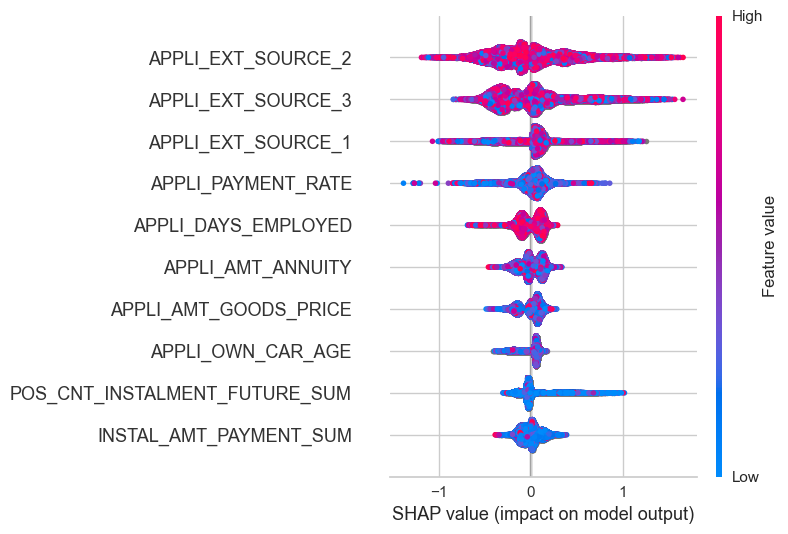

In [29]:
shap.summary_plot(shap_values, Xshap, feature_names=feat_names, max_display=10)

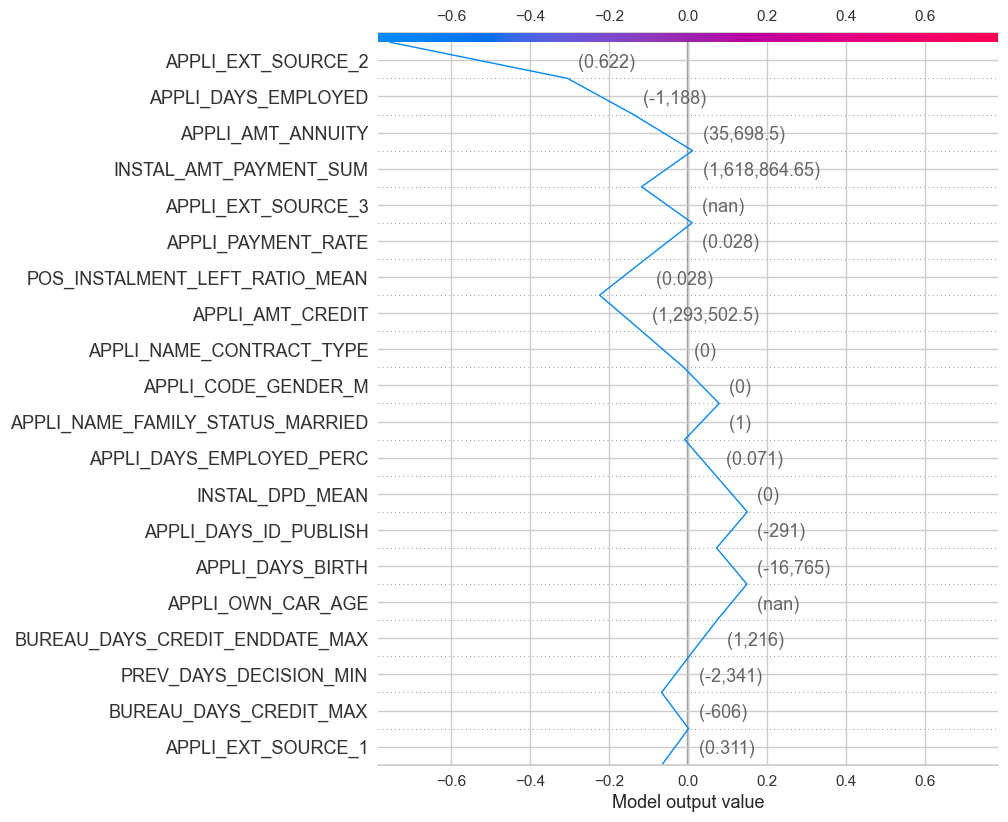

In [48]:
shap.decision_plot(exp_values[1],shap_values[1], Xshap[1], feature_names=feat_names)

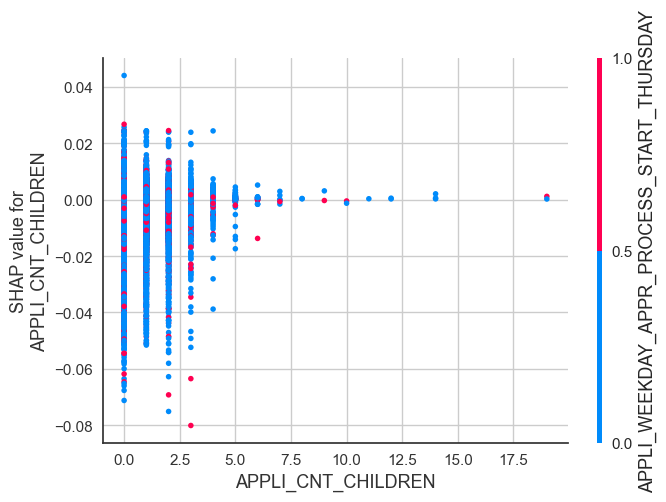

In [58]:
shap.dependence_plot(3, shap_values, Xshap, feature_names=feat_names)

In [89]:
feat_names[40]

'APPLI_CODE_GENDER_M'

In [94]:
group_mask=Xshap[:,40]==0

In [95]:
group_mask

array([False,  True, False, ...,  True,  True,  True])

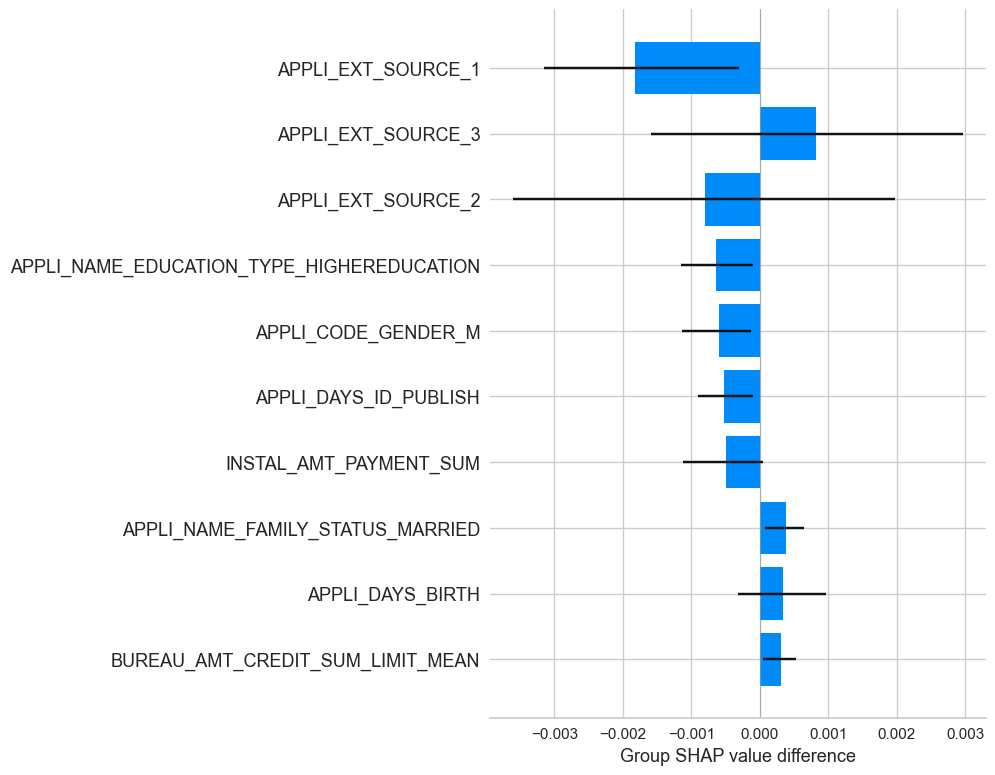

In [96]:
shap.group_difference_plot(shap_values, group_mask, feature_names=feat_names, max_display=10)